# Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

In [ ]:
# @title jpg to rgp pil.image

from PIL import Image

# Load an image file
image_path = '/content/drive/MyDrive/KAUST/Generative_AI/dump/data/flintstone_sample_images_jpg/trial_flint.jpg'  # Replace with your image path
image = Image.open(image_path).convert("RGB")  # Convert to RGB if not already


In [ ]:
import numpy as np
from PIL import Image
import os

def load_npy_images_to_pil_dict(directory):
    # Check if directory exists
    if not os.path.exists(directory):
        raise ValueError(f"Directory {directory} does not exist")

    # List all .npy files in the directory
    npy_files = [file for file in os.listdir(directory) if file.endswith('.npy')]

    # Sort files to maintain consistency; optional
    npy_files.sort()

    # Create a dictionary to store the PIL images
    pil_images_dict = {}

    # Loop through the sorted list of files
    for file in npy_files:
        # Construct full file path
        file_path = os.path.join(directory, file)

        # Load the .npy file
        frames = np.load(file_path)

        # Extract the third frame (index 2)
        frame = frames[2]  # Assuming the shape is (5, height, width, channels)

        # Convert numpy array to PIL Image
        image = Image.fromarray(frame)

        # Store the image in the dictionary with the filename as key
        pil_images_dict[file] = image

    return pil_images_dict

# Usage example: Update the 'your_directory_path' with your actual directory path containing .npy files
directory_path = '/content/drive/MyDrive/KAUST/Generative_AI/dump/more data/flintstones_data/video_frames_sampled'
pil_images_dict = load_npy_images_to_pil_dict(directory_path)

In [ ]:
# Now you can access an image directly by its filename
image_name = 's_01_e_25_shot_026928_027002.npy'  # Replace with the actual file name you want
if image_name in pil_images_dict:
    image = pil_images_dict[image_name]
    image.show()  # This will display the image if you are using an environment that supports it
else:
    print("Image not found in the directory.")


Image not found in the directory.


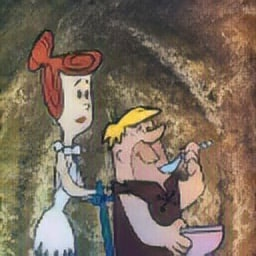

In [ ]:
image

In [ ]:

import torch
import diffusers
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
# `image` is an RGB PIL.Image


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [ ]:
# images = pipe("thunderstorm weather", image=image, num_images_per_prompt=3, image_guidance_scale = 1.2, guidance_scale=2).images
# images = pipe("gloomy background", image=image, num_images_per_prompt=3, guidance_scale=3).images
images = pipe("Add colorful, playful dolphins swimming joyfully in the background.", image=pil_images_array[0], num_images_per_prompt=3, guidance_scale=3.5).images

NameError: name 'pil_images_array' is not defined

In [ ]:
# @title json implementation 1 (bad implementation)
import json

# Function to load the JSON data into a dictionary
def load_data(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    return data

# Function to get specific information by file_name
def get_attribute_by_filename(data, file_name, attribute=None):
    # Searching for the entry with the given file_name
    for item in data:
        if item['file_name'] == file_name:
            if attribute:
                return item.get(attribute, "Attribute not found.")
            else:
                return {
                    'emotion': item['emotion'],
                    'description': item['description'],
                    'response': item['response']
                }
    return "No data found for this file name."

# Load the data
json_path = '/content/output_short.json'
data = load_data(json_path)

# Example usage: Retrieving information for a specific file_name
file_name = 's_05_e_23_shot_028963_029037'  # Change this to the file_name you want to query

# Get specific attributes
emotion = get_attribute_by_filename(data, file_name, 'emotion')
description = get_attribute_by_filename(data, file_name, 'description')
response = get_attribute_by_filename(data, file_name, 'response')

# Print results
print("Emotion:", emotion)
print("Description:", description)
print("Response:", response)


In [ ]:
print(get_attribute_by_filename(data, data[0]["file_name"], 'description'))

In [ ]:
# @title json implementation 2 (good implementation)

import json

# Function to load the JSON data into a dictionary
def load_data(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    # Create a dictionary to organize data by file_name
    organized_data = {}
    for item in data:
        filename = item['file_name']
        if filename not in organized_data:
            organized_data[filename] = {
                'emotions': [],
                'descriptions': [],
                'responses': []
            }
        # Append each emotion, description, and response to the corresponding lists
        organized_data[filename]['emotions'].append(item['emotion'])
        organized_data[filename]['descriptions'].append(item['description'])
        organized_data[filename]['responses'].append(item['response'])
    return organized_data

# Function to get specific information by file_name
def get_attributes_by_filename(data, file_name):
    # Check if the file_name exists in the data
    if file_name in data:
        return data[file_name]
    else:
        return "No data found for this file name."

# Load the data
json_path = '/content/output_long.json'
data = load_data(json_path)

# Example usage: Retrieving information for a specific file_name
file_name = 's_05_e_23_shot_028963_029037'  # Change this to the file_name you want to query

# Get attributes
attributes = get_attributes_by_filename(data, file_name)

# Print results
if isinstance(attributes, dict):
    print("Emotions:", attributes['emotions'])
    print("Descriptions:", attributes['descriptions'])
    print("Responses:", attributes['responses'])
# else:
#     print(attributes)
print("Responses:", attributes['responses'][0])

Emotions: ['happiness', 'sadness', 'anger', 'fear']
Descriptions: ["Barney walks into the dining room and takes an apple out of a pig's mouth. The pig wakes up and speaks to him.", "Barney walks into the dining room and takes an apple out of a pig's mouth. The pig wakes up and speaks to him.", "Barney walks into the dining room and takes an apple out of a pig's mouth. The pig wakes up and speaks to him.", "Barney walks into the dining room and takes an apple out of a pig's mouth. The pig wakes up and speaks to him."]
Responses: ['Add colorful flowers and bright sunshine outside the window.', 'Add wilted flowers on the table next to Barney.', 'Add broken dishes and overturned chairs in the background.', 'Add eerie shadows looming over the dining room window.']
Responses: Add colorful flowers and bright sunshine outside the window.


In [ ]:
counter = 0
imagelist = []

print(data)

for entry in data:
    name = entry
    # print(entry)
    npyname = name + '.npy'

    # Check if the image filename exists in the dictionary
    if npyname in pil_images_dict:
        image = pil_images_dict[npyname]
        # image.show()  # This will display the image if you are using an environment that supports it

        # Append the image along with its filename to the list
        imagelist.append((image, name))

        # Increment counter for each found image
        counter += 1


{'s_05_e_23_shot_028963_029037': {'emotions': ['happiness', 'sadness', 'anger', 'fear'], 'descriptions': ["Barney walks into the dining room and takes an apple out of a pig's mouth. The pig wakes up and speaks to him.", "Barney walks into the dining room and takes an apple out of a pig's mouth. The pig wakes up and speaks to him.", "Barney walks into the dining room and takes an apple out of a pig's mouth. The pig wakes up and speaks to him.", "Barney walks into the dining room and takes an apple out of a pig's mouth. The pig wakes up and speaks to him."], 'responses': ['Add colorful flowers and bright sunshine outside the window.', 'Add wilted flowers on the table next to Barney.', 'Add broken dishes and overturned chairs in the background.', 'Add eerie shadows looming over the dining room window.']}, 's_04_e_10_shot_026510_026584': {'emotions': ['happiness', 'sadness', 'anger', 'fear'], 'descriptions': ['Fred and Barney are kneeling on the ground outside a building. Betty is inside t

In [ ]:
print(counter)
# print(imagelist.shape)
print(imagelist)

166
[(<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B88D1180>, 's_03_e_17_shot_037462_037536'), (<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B88CFC10>, 's_02_e_30_shot_004004_004078'), (<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B88CD690>, 's_01_e_27_shot_020887_020961'), (<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B8CDAE00>, 's_01_e_07_shot_027644_027718'), (<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B8909570>, 's_05_e_10_shot_025883_025957'), (<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B88A2440>, 's_02_e_03_shot_032098_032172'), (<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B890B400>, 's_06_e_04_shot_039222_039296'), (<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B88E4CA0>, 's_04_e_06_shot_027549_027623'), (<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B88CE6B0>, 's_02_e_13_shot_004231_004305'), (<PIL.Image.Image image mode=RGB size=128x128 at 0x7D59B88E4E80>, 's_04_e_25_shot_007766_007840'), (<PIL

# Generate Images

In [ ]:
# @title generate images!
from IPython.display import display

counter = 0
images = []
for entry in data:
    npyname = entry + '.npy'

    # Check if the image filename exists in the dictionary
    if npyname in pil_images_dict:
        img = pil_images_dict[npyname]
        attributes = get_attributes_by_filename(data, entry)
        for i in range (0, 4):
            counter += 1
            response = attributes['responses'][i]
            emotion = attributes['emotions'][i]
            description = attributes['descriptions'][i]

            transimg = pipe(response, image=img, num_images_per_prompt=1, guidance_scale=4.5, image_guidance_scale = 2.0).images
            images.append((img, response, transimg[0], entry, emotion, description))

            print(images[counter-1])
            print(counter)
            print(emotion)
            print(description)
            print(response)
            display(img)
            display(transimg[0])

        # # Append the image along with its filename to the list
        # imagelist.append((image, name))



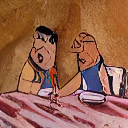

In [ ]:
images[0][2]

In [ ]:
# @title make zip of json files of the images list

import zipfile
from PIL import Image
import json
import io

def save_to_zip(images, zip_filename):
    with zipfile.ZipFile(zip_filename, 'w') as myzip:
        for idx, (img, response, trans_img, entry, emotion, description) in enumerate(images):
            # Save the original image
            img_byte_arr = io.BytesIO()
            img.save(img_byte_arr, format='PNG')
            img_byte_arr = img_byte_arr.getvalue()
            myzip.writestr(f"{idx}_{entry}_original.png", img_byte_arr)

            # Save the transformed image
            trans_img_byte_arr = io.BytesIO()
            trans_img.save(trans_img_byte_arr, format='PNG')
            trans_img_byte_arr = trans_img_byte_arr.getvalue()
            myzip.writestr(f"{idx}_{entry}_transformed.png", trans_img_byte_arr)

            # Save the metadata
            metadata = {
                'response': response,
                'emotion': emotion,
                'description': description
            }
            myzip.writestr(f"{idx}_{entry}_data.json", json.dumps(metadata))

# Example usage
zip_filename = 'output_images_long.zip'
save_to_zip(images, zip_filename)


In [ ]:
# @title zipfile recover
import zipfile
from PIL import Image
import json
import io

def load_from_zip(zip_filename):
    with zipfile.ZipFile(zip_filename, 'r') as myzip:
        images = []
        # Iterate over each file in the ZIP
        for filename in myzip.namelist():
            if filename.endswith('_original.png') or filename.endswith('_transformed.png'):
                # Extract the image
                image_data = myzip.read(filename)
                image = Image.open(io.BytesIO(image_data))
                image.load()  # Load image data

                # Extract corresponding metadata
                base_name = filename.rsplit('_', 1)[0]  # Remove the last part after '_'
                metadata_file = f"{base_name}_data.json"
                metadata_data = myzip.read(metadata_file)
                metadata = json.loads(metadata_data)

                # Reconstruct the tuple format
                if '_original.png' in filename:
                    type_img = 'original'
                else:
                    type_img = 'transformed'

                images.append((image, metadata['response'], type_img, metadata['emotion'], metadata['description']))
        return images

# Example usage
zip_filename = 'output_images.zip'
recovered_images = load_from_zip(zip_filename)
for img, response, type_img, emotion, description in recovered_images:
    print(f"Type: {type_img}, Emotion: {emotion}, Description: {description}, Response: {response}")
    # display(img)  # This will display the image

